### Actividad de perceptrón y perceptrón multicapa
#### Autor: Francisco Serradilla

Tareas:

- Escribir el código de propagación y actualización de pesos del perceptrón.
- Escribir el código de propagación y actualización de pesos del perceptrón multicapa para una capa oculta.
- Encontrar arquitecturas mínimas para el problema no lineal y el problema de clasificación de orquídeas.
- Ampliar el código del perceptrón Multicapa para calcular el error de test a partir de otro conjunto de datos.
- Probar entrenamiento y cálculo del error de test con el juego de datos de aprobados.
- (hacer al menos dos) Probar con problemas adicionales (circulo, aprobados, fun, morosos). Al final hay una explicación de los conjuntos de datos suministrados.
- (opcional) Añadir una segunda capa oculta al perceptrón multacapa y/o un múmero indefinido de capas.

In [2]:
import numpy as np

#np.random.seed(1)

In [8]:
class Perceptron:
    def __init__(self, ninput, noutput):
        self.ninput = ninput
        self.noutput = noutput
        self.w = np.random.rand(ninput,noutput)-0.5
        self.b = np.random.rand(noutput)-0.5
       
    def forward (self, x): # propaga un vector x y devuelve la salida
        # a implementar
        #np.matmul() multiplica matrices
        neta = np.matmul(x,self.w) + self.b;
        return np.piecewise(neta, [neta < 0, neta >= 0], [0, 1]) #funcion escalon
   
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s = self.forward(x) # propaga
        etranspose = x.reshape(-1,1) #trasponer el vector (todos sus elementos con -1) a 1 columna
        AW = alpha*etranspose*(d-s)
        self.w = self.w + AW
       
    def RMS (self, X, D):
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
       
    def accuracy (self, X, D):
        S = self.forward(X)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
   
    def info (self, X, D):
        print('     RMS: %6.5f' % self.RMS(X,D))
        print('Accuracy: %6.5f' % self.accuracy(X,D))
       
    def train (self, X, D, alpha, epochs, trace=0):
        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)
    def test(self, X, D):
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy
        self.info(X,D)

In [10]:
# entrena para la OR

p = Perceptron(2,1)

# or
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [1.0]])

p.info(data, labels)
p.train(data, labels, 0.01, 50, 10)



     RMS: 0.75000
Accuracy: 0.25000

   Epoch: 10
     RMS: 0.75000
Accuracy: 0.25000

   Epoch: 20
     RMS: 0.75000
Accuracy: 0.25000

   Epoch: 30
     RMS: 0.50000
Accuracy: 0.50000

   Epoch: 40
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 50
     RMS: 0.00000
Accuracy: 1.00000


In [20]:
# holi Perceptrón multi capa para una capa oculta 
class Multilayer:
    def __init__(self, ninput, nhidden, noutput):
        self.ninput = ninput
        self.nhidden = nhidden
        self.noutput = noutput
        self.w1 = np.random.rand(ninput,nhidden)-0.5
        self.b1 = np.random.rand(nhidden)-0.5
        self.w2 = np.random.rand(nhidden,noutput)-0.5
        self.b2 = np.random.rand(noutput)-0.5
        
        self.sx = []
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos
        self.laccuracy = [] # contiene la lista de accuracy

    def sigm (self, neta):
        return 1.0 / (1.0 + np.exp(-neta))

    def forward (self, x): # propaga un vector x y devuelve la salida
        self.sx = []
        # Propagación 
        # Capa 1
        #sx.append(self.forward(x))     # Salida para la propagación de la capa 1
        netax = np.matmul(x,self.w1) + self.b1;
        self.sx.append(self.sigm(netax)) # sk = Fs(s(k-1)*Wk+bk)
        
        # Capa 2
        #sx.append(self.forward(sx[0])) # Salida para la propagación de la capa 2
        netax = np.matmul(self.sx[0],self.w2) + self.b2;
        self.sx.append(self.sigm(netax)) # sk = Fs(s(k-1)*Wk+bk)
        return self.sx[-1]

    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        # a implementar
        AW = []    # delta pesos   inicia de la capa final y termina en la inicial  F-->I
        Ab = []    # delta bias    inicia de la capa final y termina en la inicial  F-->I
        delta = [] # Deltas error  inicia de la capa final y termina en la inicial  F-->I
        #sx = []    # Salidas inicia en la capa inicial y termina en la final  I-->F
        
        self.forward(x)
        # Retropropagar 
        # Capa final (capa 2)
        # Error de la capa final 
        delta.append((d-self.sx[1])*self.sx[1]*([1]-self.sx[1])) # Error para la capa final (capa 2)

        # Modificar pesos para la capa final
        s1tras = self.sx[0].reshape(-1,1) #trasponer
      
        AW.append(alpha * s1tras * delta[0]) # dif pesos
        Ab.append(alpha * delta[0]) # dif bias
        
        # Primera capa (capa 1)
        # Error de la primera capa (capa 1)
        W2tras = self.w2.transpose() ## creo que este era el error 
        fderivada = self.sx[0] * ([1] - self.sx[0])
        
        delta.append(np.matmul(delta[0], W2tras)*fderivada)
        
        # Modificar pesos para la primera capa
        s0tras = x.reshape(-1,1) #trasponer
        AW.append(alpha * s0tras * delta[1]) # dif pesos
        Ab.append(alpha * delta[1]) # dif bias
        
        #actualizar pesos y bias
        # Capa 2 
        self.w2 = self.w2 + AW[0]
        self.b2 = self.b2 + Ab[0]
        
        # Capa 1 
        self.w1 = self.w1 + AW[1]
        self.b1 = self.b1 + Ab[1]
        
        
    def RMS (self, X, D):
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D):
        S = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors

    def info (self, X, D):
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0):
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X,D)
    def test(self, X, D):
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy
        self.info(X,D)
        
def one_hot (d):
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

In [21]:
# xor
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [0.0]])

p = Multilayer(2,2,1)

p.info(data, labels)
p.train(data, labels, 0.8, 5000, 1000)


     RMS: 0.50001
Accuracy: 0.50000

   Epoch: 1000
     RMS: 0.39513
Accuracy: 0.75000

   Epoch: 2000
     RMS: 0.05843
Accuracy: 1.00000

   Epoch: 3000
     RMS: 0.03407
Accuracy: 1.00000

   Epoch: 4000
     RMS: 0.02616
Accuracy: 1.00000

   Epoch: 5000
     RMS: 0.02196
Accuracy: 1.00000


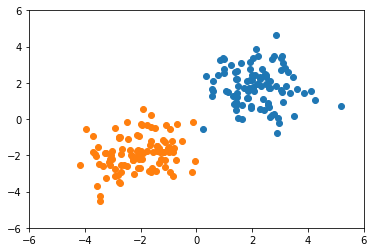


   Epoch: 1
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 2
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 3
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 4
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 5
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 6
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 7
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 8
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 9
     RMS: 0.00500
Accuracy: 0.99500

   Epoch: 10
     RMS: 0.00500
Accuracy: 0.99500


In [22]:
# example data from two classes; 2D normal distributions
num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

import matplotlib.pyplot as plt
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')

plt.show()

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

p = Perceptron(2,1)

p.train(X, d, 0.01, 10, 1)

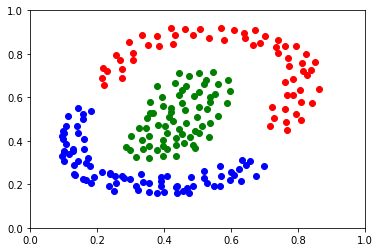


   Epoch: 20
     RMS: 0.42228
Accuracy: 0.61270

   Epoch: 40
     RMS: 0.37958
Accuracy: 0.67619

   Epoch: 60
     RMS: 0.36418
Accuracy: 0.67778

   Epoch: 80
     RMS: 0.34516
Accuracy: 0.69206

   Epoch: 100
     RMS: 0.32428
Accuracy: 0.71905

   Epoch: 120
     RMS: 0.29896
Accuracy: 0.74762

   Epoch: 140
     RMS: 0.23977
Accuracy: 0.82540

   Epoch: 160
     RMS: 0.17043
Accuracy: 0.90317

   Epoch: 180
     RMS: 0.13160
Accuracy: 0.93810

   Epoch: 200
     RMS: 0.10096
Accuracy: 0.96349

   Epoch: 220
     RMS: 0.07673
Accuracy: 0.98889

   Epoch: 240
     RMS: 0.05947
Accuracy: 0.99206

   Epoch: 260
     RMS: 0.04758
Accuracy: 0.99365

   Epoch: 280
     RMS: 0.03925
Accuracy: 1.00000

   Epoch: 300
     RMS: 0.03331
Accuracy: 1.00000


In [23]:
# regiones no lineales (data 3)

X = np.loadtxt('samples/data_3classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

p = Multilayer(ni,15,no)

# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt
p.train(X, d, 0.8, 300, 20)

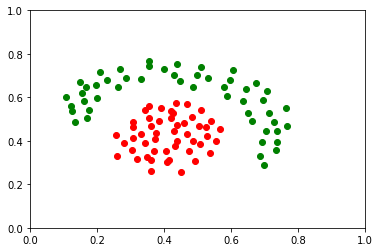


   Epoch: 20
     RMS: 0.48420
Accuracy: 0.50000

   Epoch: 40
     RMS: 0.40734
Accuracy: 0.54000

   Epoch: 60
     RMS: 0.35114
Accuracy: 0.65000

   Epoch: 80
     RMS: 0.31756
Accuracy: 0.70000

   Epoch: 100
     RMS: 0.29842
Accuracy: 0.71000

   Epoch: 120
     RMS: 0.28877
Accuracy: 0.72000

   Epoch: 140
     RMS: 0.28390
Accuracy: 0.75000

   Epoch: 160
     RMS: 0.24532
Accuracy: 0.81000

   Epoch: 180
     RMS: 0.13403
Accuracy: 0.95000

   Epoch: 200
     RMS: 0.08026
Accuracy: 1.00000

   Epoch: 220
     RMS: 0.05792
Accuracy: 1.00000


In [24]:
# regiones no lineales (data 2)

X = np.loadtxt('samples/data_2classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

p = Multilayer(ni,15,no)

# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt
p.train(X, d, 1, 220, 20)

In [26]:
# Orquideas

X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

# convierte la salida a enteros
d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

p = Multilayer(ni,20,no)

# encontrar arquitectura mínima que aprende este problema
p.train(X, d, 0.8, 600, 100)


   Epoch: 100
     RMS: 0.26366
Accuracy: 0.78667

   Epoch: 200
     RMS: 0.04024
Accuracy: 0.97333

   Epoch: 300
     RMS: 0.06797
Accuracy: 0.94667

   Epoch: 400
     RMS: 0.02867
Accuracy: 0.98000

   Epoch: 500
     RMS: 0.03080
Accuracy: 0.97778

   Epoch: 600
     RMS: 0.02519
Accuracy: 0.98222


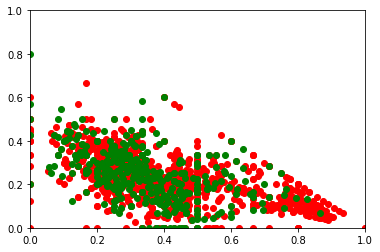


   Epoch: 1
     RMS: 0.28884
Accuracy: 0.73401

   Epoch: 2
     RMS: 0.18010
Accuracy: 0.86465

   Epoch: 3
     RMS: 0.03017
Accuracy: 1.00000

   Epoch: 4
     RMS: 0.01927
Accuracy: 1.00000

   Epoch: 5
     RMS: 0.01612
Accuracy: 1.00000

TEST:

     RMS: 0.01624
Accuracy: 1.00000


In [27]:
# quinielas

X = np.loadtxt('samples/quinielas60-3-trn.txt')
test = np.loadtxt('samples/quinielas60-3-tst.txt')

dt = test[:,-1].astype('int')
d = X[:,-1].astype('int')
X = X[:,:-1]
test = test[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)
dt = one_hot(dt)

p = Multilayer(ni,2,no)

# encontrar arquitectura mínima que aprende este problema
p.train(X, d, 1, 5, 1)
print("\nTEST:\n")
p.info(test, dt)

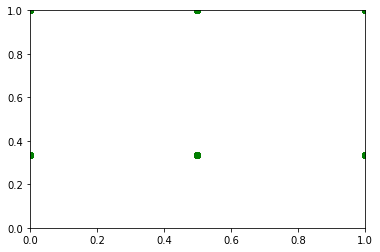


   Epoch: 100
     RMS: 0.19080
Accuracy: 0.85142

   Epoch: 200
     RMS: 0.15313
Accuracy: 0.88195

   Epoch: 300
     RMS: 0.12972
Accuracy: 0.90502

   Epoch: 400
     RMS: 0.11265
Accuracy: 0.91452

   Epoch: 500
     RMS: 0.09754
Accuracy: 0.93148

TEST:

     RMS: 0.32468
Accuracy: 0.67544


In [29]:
#morosos
X = np.loadtxt('samples/morosos-ent.txt')
test = np.loadtxt('samples/morosos-tst.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]
dt = test[:,-1].astype('int')
test = test[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)
dt = one_hot(dt)

p = Multilayer(ni,40,no)

p.train(X, d, 1, 500, 100)
print("\nTEST:\n")
p.info(test, dt)

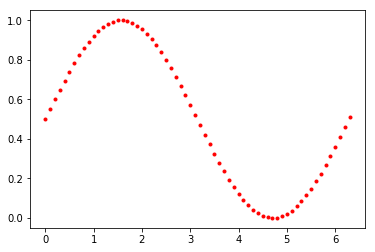


   Epoch: 100
     RMS: 0.46119
Accuracy: 0.50051

   Epoch: 200
     RMS: 0.46119
Accuracy: 0.50018

   Epoch: 300
     RMS: 0.45999
Accuracy: 0.50000

   Epoch: 400
     RMS: 0.45362
Accuracy: 0.50000

   Epoch: 500
     RMS: 0.45858
Accuracy: 0.50000

TEST:



ValueError: operands could not be broadcast together with shapes (63,64) (63,) 

In [31]:
#fun
X = np.loadtxt('samples/fun-trn.txt')
test = np.loadtxt('samples/fun-tst.txt')

d = X[:,-1]
X = X[:,:-1]
dt = test[:,-1].astype('int')
test = test[:,:-1]

plt.figure()
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.plot(X, d, 'r.')
plt.show()

no = len(set(d))
ni = X.shape[1]

p = Multilayer(ni,30,no)

p.train(X, d, 0.8, 500, 100)
print("\nTEST:\n")
p.info(test, dt)

### Explicación de los archivos de datos suministrados

#### Aprobados

Contiene 3 entradas, correspondiente a la nota en 3 ejercicios, y 1 salida, que indica si el alumno aprobó o no. Se trataría de predecir si un alumno va a aprobar a partir de sus notas. Es un problema de clasificación.

Cuestiones: ¿Es un problema lineal? ¿Puede aprenderla una red de neuronas?

#### Fun

Contiene 1 entrada y 1 salida, que son la *x* y la *y* de una función desconocida. Es un problema de ajuste o regresión.

Cuestiones: ¿Es una función lineal? ¿Puede aprenderla una red de neuronas? ¿Puede decirnos la red qué función es?

#### Morosos

Contiene datos de mnorosidad de un banco. La idea es predecir si un nuevo cliente va a devolver un prestamo o no y utilizar esta predicción para concederle o denegarle el préstamo. Es un problema de clasificación.

Tiene 9 entradas y 1 salida.

Cuestiones: ¿Es una función lineal? ¿Cuál es el porcentaje de acierto estimado en test?

#### Quinielas

Contiene datos de quinielas deportivas. Tiene 60 entradas y 3 salidas (1, X, 2). Es un problema de clasificación.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Sensores

Contiene datos de sensores y velocidades medias en la M-40. La idea es ver si se puede predecir la velocidad media en un punto que no tiene sensor a partir de las lecturas de los sensores en otros puntos. Es un problema de ajuste o regresión.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Circulo

Es un problema de clasificación con 3 regiones concéntricas. No tiene conjunto de test, el objetivo es encontrar la red mínima que pueda clasificar correctamente todos los ejemplos.

#### Encoder

Es el problema clásico de utilizar una capa oculta para codificar patrones de 8 valores en una dimensión menor. El objetivo es entrenar un perceptrón 8-3-8 para que aprenda esta codificación en el 100% de los ejemplos.  Es un problema de clasificación.

#### Pima-diabetes

Contiene resultados de un conjunto de análisis y pruebas en personas que posteriormente desarrollaron o no diabetes. La idea es ver si se puede predecir si una persona va a desarrollar la enfermedad en el futuro.

En este caso hay que separar aleatoriamente un 30% de ejemplos para tener una conjunto de test. Nota: se sugiere usar la función shuffle.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

In [34]:
# Perceptrón multi capa para 3 capas ocultas
# lista de neuronas 
# 
class MultilayerPro:
    def __init__(self, ninput, nhidden, noutput):
        self.ninput = ninput
        self.nhidden = nhidden
        self.noutput = noutput

        self.w = []
        self.b = []
        for a in range(nhidden + 1): 
            self.w.append(np.random.rand(ninput,nhidden)-0.5)
            self.b.append(np.random.rand(nhidden)-0.5)
        
        self.sx = []
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos
        self.laccuracy = [] # contiene la lista de accuracy

    def sigm (self, neta):
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
        self.sx = []
        
        for a in range(self.nhidden):
            netax = np.matmul(x,self.w[a]) + self.b[a];
            self.sx.append(self.sigm(netax)) # sk = Fs(s(k-1)*Wk+bk)
            x = sx[-1]
            
        return self.sx[-1]
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        # a implementar
        AW = []    # delta pesos   inicia de la capa final y termina en la inicial  F-->I
        Ab = []    # delta bias    inicia de la capa final y termina en la inicial  F-->I
        delta = [] # Deltas error  inicia de la capa final y termina en la inicial  F-->I
        #sx = []    # Salidas inicia en la capa inicial y termina en la final  I-->F
        
        self.forward(x)
        # Retropropagar 
        # Capa final
        # Error de la capa final 
        delta.append((d-self.sx[-1])*self.sx[-1]*([1]-self.sx[-1])) # Error para la capa final

        # Modificar pesos para la capa final
        s1tras = self.sx[nhidden-2].reshape(-1,1) #trasponer
        
        AW.append(alpha * s1tras * delta[0]) # dif pesos
        Ab.append(alpha * delta[0]) # dif bias
        
        
        
        for a in range(self.nhidden -1): # nhidden -1 ya que están realizados los cálculos para la última capa
            # Para la capa nhidden - a
            # Error 
            Wanterior = self.w[nhidden-a].transpose() 
            fderivada = self.sx[nhidden] * ([1] - self.sx[0])
            fderivada = self.sx[0] * ([1] - self.sx[0])

            delta.append(np.matmul(delta[0], Wanterior)*fderivada)

            # Modificar pesos para la primera capa
            s0tras = x.reshape(-1,1) #trasponer
            AW.append(alpha * s0tras * delta[1]) # dif pesos
            Ab.append(alpha * delta[1]) # dif bias

            #actualizar pesos y bias
            # Capa 2 
            self.w2 = self.w2 + AW[0]
            self.b2 = self.b2 + Ab[0]

            # Capa 1 
            self.w1 = self.w1 + AW[1]
            self.b1 = self.b1 + Ab[1]
        
        
        
    def RMS (self, X, D):
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D):
        S = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D):
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0):
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1):
            for i in range(len(X)):
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0:
                print('\\n   Epoch: %d' % e)
                self.info(X,D)
                
def one_hot (d):
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels